# Text Classifier

In this example, we will use 1-dimension convolution to make text classifier.

Reference : https://github.com/keras-team/keras/blob/master/examples/imdb_cnn.py

>Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

>As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.
[keras dataset imdb](https://keras.io/datasets/)

In [8]:
# Settings
from __future__ import print_function

max_features = 2000 # IMDB contains max 25,000 features
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
dropout_ratio = 0.2
epochs = 2

## Prepare imdb Dataset

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

print('Loading data')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('Finished Loading Data')

Loading data
Finished Loading Data


## Model - Convolution w/ Keras

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims)) # Hidden Layer
model.add(Dropout(dropout_ratio))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [11]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 363s 15ms/step - loss: 0.4159 - acc: 0.7907 - val_loss: 0.3023 - val_acc: 0.8699
Epoch 2/2
25000/25000 [==============================] - 373s 15ms/step - loss: 0.2633 - acc: 0.8912 - val_loss: 0.2669 - val_acc: 0.8873


## Prediction

In [12]:
result = model.evaluate(x_test, y_test, verbose=1)
print('loss:', result[0], 'accuracy:', result[1])

25000/25000 [==============================] - 44s 2ms/step
loss: 0.2669229516363144 accuracy: 0.88732


## Result 

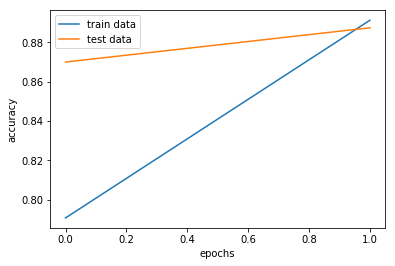

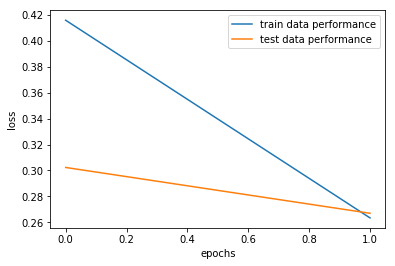

In [16]:
import matplotlib.pyplot as plt

if not isinstance(history, dict):
    history = history.history

plt.figure(1)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train data', 'test data'], loc=0)

plt.figure(2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train data performance', 'test data performance'], loc=0)
plt.show()